In [ ]:
#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve,roc_auc_score
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from math import sqrt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_csv('dataset.csv')
#deu = df[df['iso'] == "JPN"]

deu = df[(df.iso == 'DEU') | (df.iso == 'GBR')| (df.iso == 'AUT')| (df.iso == 'BEL')| (df.iso == 'ITA') | (df.iso == 'DNK')| 
         (df.iso == 'PRT')| (df.iso == 'CHE')| (df.iso == 'SWE') | (df.iso == 'FRA') | (df.iso == 'ESP') | (df.iso == 'NLD')
        | (df.iso == 'IRL')| (df.iso == 'NOR')| (df.iso == 'GRC')| (df.iso == 'FIN')]


new_data=deu.fillna(deu.mean())

#new_data.isnull().sum()
#test.isnull().any()

In [ ]:

x = new_data[[ 'govvote', 'oppvote', 'partycount', 'protests','rgdp', 'gdppeak', 'frac',
              'crisisJST', 'cpi', 'turnover', 'vetopl', 'dict']]
y = new_data.pk_fin

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=100)

In [ ]:
MLA = [
    #Ensemble Methods
    #ensemble.AdaBoostClassifier(),
    #ensemble.BaggingClassifier(),
    #ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    #linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    #linear_model.SGDClassifier(),
    #linear_model.Perceptron(),
    
    #Navies Bayes
    #naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    #SVM
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    #svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
    ]

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
0,GradientBoostingClassifier,0.9874,0.9793,0.500000,0.083333,0.540786
3,LogisticRegressionCV,0.9649,0.9793,0.000000,0.000000,0.500000
4,RidgeClassifierCV,0.9644,0.9793,0.000000,0.000000,0.500000
6,KNeighborsClassifier,0.9644,0.9793,0.000000,0.000000,0.500000
7,SVC,0.9776,0.9793,0.000000,0.000000,0.500000
1,RandomForestClassifier,0.9966,0.9724,0.000000,0.000000,0.496479
2,GaussianProcessClassifier,0.9920,0.9621,0.083333,0.083333,0.531984
5,GaussianNB,0.9546,0.9621,0.000000,0.000000,0.491197
8,DecisionTreeClassifier,1.0000,0.9586,0.125000,0.166667,0.571009


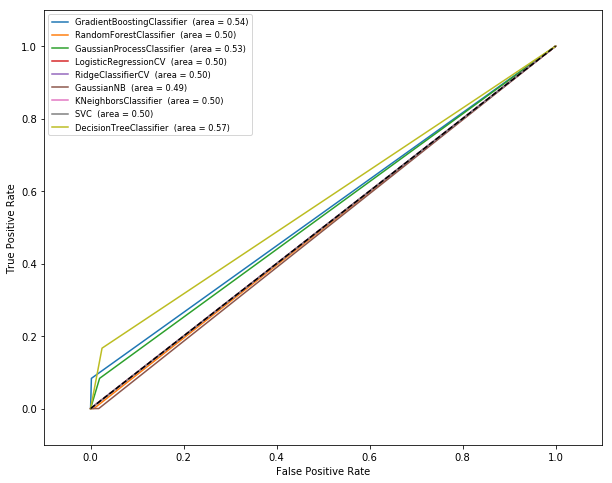

In [43]:

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

plt.figure(figsize=(10,8))
row_index = 0
for alg in MLA:
    predicted = alg.fit(x_train, y_train).predict(x_test)
    #predicted= pred.predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
   # MLA_compare.loc[row_index, 'MLA AUC'] = roc_auc_score(y_test,predicted)
    
    plt.plot(fp,tp, label='%s  (area = %0.2f)' % (MLA_name, roc_auc_score(y_test,predicted)))
    row_index+=1
  

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')


MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

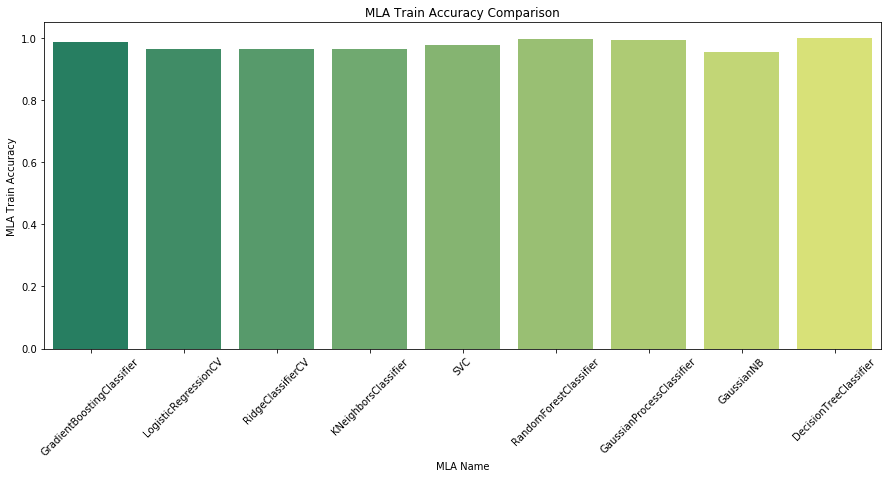

In [44]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='summer')
plt.xticks(rotation=45)
plt.title('MLA Train Accuracy Comparison')
plt.show()

In [61]:
tunealg = linear_model.LogisticRegressionCV() #Select the algorithm to be tuned
tunealg.fit(x_train, y_train)

print('BEFORE tuning Parameters: ', tunealg.get_params())
print("BEFORE tuning Training w/bin set score: {:.2f}". format(tunealg.score(x_train, y_train))) 
print("BEFORE tuning Test w/bin set score: {:.2f}". format(tunealg.score(x_test, y_test)))
print('-'*10)

BEFORE tuning Parameters:  {'Cs': 10, 'class_weight': None, 'cv': 'warn', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}
BEFORE tuning Training w/bin set score: 0.96
BEFORE tuning Test w/bin set score: 0.98
----------


In [ ]:
param_grid = { #'Cs': [0.001, 0.01, 0.1],
              #'intercept_scaling' : [1],
              #'dual': False,
              #'fit_intercept':True,
              #'n_jobs': [30],
              'random_state' : [600],
              'penalty':['l2']
            
             }
# So, what this GridSearchCV function do is finding the best combination of parameters value that is set above.
tune_model = model_selection.GridSearchCV(linear_model.LogisticRegressionCV(), param_grid=param_grid, scoring = 'accuracy')
tune_model.fit (x_train, y_train)

print('AFTER tuning Parameters: ', tune_model.best_params_)
print("AFTER tuning Training w/bin set score: {:.2f}". format(tune_model.score(x_train, y_train))) 
print("AFTER tuning Test w/bin set score: {:.2f}". format(tune_model.score(x_test, y_test)))
print('-'*10)